# B

In [1]:
library(Seurat)
library(pheatmap)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)

Attaching SeuratObject


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp



In [2]:
top_genes = function(degs){
    rownames(degs) = NULL
    degs = degs[!str_detect(degs$gene,'^RPL'),]
    degs = degs[!str_detect(degs$gene,'^RPS'),]
    for (cluster in unique(degs$cluster)){
        message(cluster)
        print(degs[degs$cluster == cluster,] %>% arrange(desc(avg_log2FC)) %>% head(n=50))
    } 
}

In [3]:
bcell = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/b.rds')

In [4]:
Idents(bcell) = bcell$seurat_clusters
degs_Bmem = FindAllMarkers(bcell[,!bcell$minor %in% c('Bnaive1','Bnaive2','Bnaive3','Bgc')],logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 6

Calculating cluster 7

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 16

Calculating cluster 17



In [5]:
top_genes(degs_Bmem)

2



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster     gene
1  1.146014e-305  2.0483348 0.960 0.631 2.181896e-301       2   ATP1B3
2   0.000000e+00  1.7689757 0.927 0.529  0.000000e+00       2   ZNF331
3  3.976785e-251  1.4370895 0.752 0.273 7.571402e-247       2    NR4A3
4  9.661662e-233  1.3741932 0.935 0.557 1.839484e-228       2    NR4A2
5   2.067625e-63  1.3646935 0.403 0.188  3.936551e-59       2    PGAP1
6  3.526528e-241  1.3609266 0.922 0.566 6.714156e-237       2   VPS37B
7  7.842913e-115  1.3276354 0.674 0.358 1.493212e-110       2     NEK1
8  7.904178e-199  1.3023655 0.936 0.633 1.504877e-194       2      LY9
9  1.111198e-172  1.2965898 0.773 0.379 2.115609e-168       2    USP36
10 9.580473e-263  1.2715779 0.982 0.675 1.824026e-258       2     ELL2
11 3.830911e-126  1.2347766 0.841 0.573 7.293672e-122       2    ALG13
12 2.070538e-204  1.2129971 0.949 0.654 3.942097e-200       2     CREM
13 3.773956e-123  1.1793073 0.508 0.191 7.185236e-119       2    PCBP3
14  3.

3



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1  2.901482e-157  1.0549464 0.908 0.531 5.524131e-153       3      PDE4D
2  5.169429e-116  0.9647963 0.822 0.495 9.842076e-112       3      HIPK2
3  5.059503e-105  0.9232834 0.584 0.254 9.632788e-101       3     TBXAS1
4   1.587731e-45  0.7525899 0.339 0.157  3.022881e-41       3       INSR
5   4.995462e-29  0.6278319 0.643 0.501  9.510860e-25       3      PHTF2
6   5.893115e-43  0.6075732 0.592 0.381  1.121990e-38       3 AC119396.1
7   2.292731e-55  0.6044113 0.706 0.471  4.365130e-51       3    S100A10
8   3.276941e-49  0.5926587 0.761 0.552  6.238967e-45       3       KYNU
9   3.328945e-56  0.5894595 0.517 0.271  6.337979e-52       3    GRAMD1C
10  4.894951e-26  0.5879031 0.550 0.409  9.319498e-22       3      FKBP5
11  1.429510e-43  0.5627183 0.889 0.755  2.721645e-39       3      CRIP1
12  5.676464e-41  0.5599157 0.725 0.528  1.080742e-36       3      MICU2
13  4.908179e-48  0.5456209 0.631 0.395  9.344682e-

4



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1  5.014448e-177  1.5721399 0.474 0.110 9.547008e-173       4    ZNF804A
2  2.001655e-110  1.3362822 0.304 0.070 3.810950e-106       4     RASSF6
3  3.246369e-109  1.1398539 0.510 0.195 6.180763e-105       4 CSGALNACT1
4  1.017818e-128  1.0693726 0.914 0.646 1.937823e-124       4       TCF4
5   6.792897e-88  1.0142133 0.561 0.268  1.293300e-83       4 AL592429.2
6   1.413893e-77  1.0026897 0.527 0.237  2.691911e-73       4      MYO1E
7   1.753589e-84  0.9442561 0.663 0.367  3.338659e-80       4       GAB2
8  2.447914e-117  0.9420223 0.684 0.330 4.660583e-113       4       RHEX
9   9.525143e-68  0.9076851 0.451 0.192  1.813492e-63       4       TFEC
10 2.048840e-126  0.8959096 0.412 0.112 3.900787e-122       4      PTPRJ
11  1.741950e-82  0.8568932 0.798 0.568  3.316499e-78       4      ITPR2
12  3.487610e-47  0.8534283 0.295 0.122  6.640062e-43       4     IQGAP2
13  1.755032e-35  0.8520168 0.518 0.355  3.341405e-

6



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster      gene
1  7.036683e-13  0.6229828 0.428 0.334 1.339714e-08       6   SLC35F1
2  2.677090e-93  0.5910034 0.964 0.851 5.096911e-89       6     EEF1G
3  3.757419e-22  0.4700805 0.837 0.766 7.153751e-18       6     CRIP1
4  4.289074e-41  0.4692978 0.873 0.752 8.165967e-37       6    SNHG29
5  6.780838e-35  0.4685827 0.841 0.719 1.291004e-30       6      NME2
6  1.764715e-42  0.4523515 0.911 0.797 3.359842e-38       6      GAS5
7  3.839908e-31  0.4362861 0.829 0.706 7.310802e-27       6     SNHG6
8  2.131791e-55  0.4100495 0.978 0.955 4.058717e-51       6    EEF1B2
9  4.155313e-24  0.3939491 0.802 0.649 7.911301e-20       6  HLA-DQA2
10 4.461604e-09  0.3911857 0.406 0.329 8.494447e-05       6     MYADM
11 1.899986e-05  0.3906740 0.609 0.570 3.617383e-01       6  HIST1H4C
12 2.444299e-36  0.3868974 0.960 0.852 4.653701e-32       6  HLA-DPB1
13 1.202910e-26  0.3867872 0.740 0.603 2.290221e-22       6    SNHG32
14 3.654071e-16  0.3

7



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1   1.429013e-42  2.6498235 0.528 0.394  2.720698e-38       7      IGHG1
2   1.786895e-45  2.3596841 0.681 0.448  3.402070e-41       7      IGLC2
3   1.130299e-78  2.3473034 0.918 0.784  2.151976e-74       7       IGKC
4   0.000000e+00  2.3405542 0.614 0.071  0.000000e+00       7     S100A8
5   0.000000e+00  2.2886239 0.662 0.088  0.000000e+00       7     S100A9
6   2.931950e-66  2.1950060 0.653 0.490  5.582139e-62       7      IGHA1
7   3.489970e-93  2.0740526 0.618 0.366  6.644554e-89       7      IGHG3
8   3.976925e-52  1.7765322 0.434 0.241  7.571668e-48       7      IGHG4
9  8.730334e-235  1.6911652 0.986 0.966 1.662168e-230       7       ACTB
10  1.041327e-69  1.6548222 0.442 0.214  1.982583e-65       7      IGHA2
11  5.238158e-59  1.5971908 0.534 0.283  9.972929e-55       7      IGLC3
12 5.610610e-124  1.5367385 0.607 0.286 1.068204e-119       7    S100A11
13 4.986685e-212  1.4021640 0.347 0.040 9.494150e-2

9



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1  3.463789e-153  2.2768281 0.484 0.123 6.594708e-149       9       SOX5
2   1.230784e-71  1.5568268 0.458 0.193  2.343290e-67       9    MACROD2
3   2.319925e-98  1.2500795 0.664 0.313  4.416905e-94       9        TOX
4  8.366981e-133  1.1646703 0.695 0.278 1.592990e-128       9      RFTN1
5  1.134044e-147  1.1596792 0.399 0.079 2.159107e-143       9     NIBAN1
6   2.013945e-81  1.1358992 0.835 0.554  3.834350e-77       9      PDE4D
7   9.602973e-95  1.1100340 0.430 0.140  1.828310e-90       9      FCRL5
8   4.228538e-82  1.1063648 0.728 0.395  8.050714e-78       9      HDAC9
9  6.740270e-123  1.0650103 0.956 0.845 1.283280e-118       9   RABGAP1L
10  1.088608e-56  1.0052623 0.477 0.231  2.072602e-52       9    PITPNC1
11 6.006948e-169  0.9505961 0.511 0.114 1.143663e-164       9       HOPX
12  1.545739e-09  0.9497217 0.414 0.317  2.942933e-05       9       RGS1
13 2.106037e-191  0.9229648 0.327 0.036 4.009684e-1

10



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  2.362603e-78  0.8696669 0.718 0.373 4.498160e-74      10      STAT4
2  8.410885e-26  0.7794048 0.378 0.207 1.601348e-21      10      PGAP1
3  2.548391e-17  0.6745235 0.301 0.171 4.851882e-13      10      FAAH2
4  4.702823e-65  0.6707349 0.920 0.658 8.953704e-61      10        LY9
5  5.153849e-63  0.6425763 0.711 0.386 9.812412e-59      10       PAK1
6  5.288189e-59  0.6241076 0.933 0.678 1.006818e-54      10       CREM
7  2.151327e-52  0.6119204 0.797 0.505 4.095911e-48      10    ANKRD37
8  4.285874e-62  0.6105096 0.905 0.662 8.159875e-58      10     ATP1B3
9  5.127042e-57  0.6015613 0.969 0.783 9.761376e-53      10       BRAF
10 2.795430e-41  0.5969339 0.883 0.698 5.322219e-37      10     ADGRE5
11 2.082906e-24  0.5937554 0.730 0.541 3.965645e-20      10      CMSS1
12 9.109868e-61  0.5895597 0.940 0.717 1.734428e-56      10      PARP8
13 1.448699e-24  0.5735601 0.974 0.838 2.758178e-20      10      HSPD1
14 1.1

11



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  6.004225e-87  1.3164752 0.880 0.555 1.143144e-82      11      PDE4D
2  3.268448e-71  1.1310918 0.751 0.447 6.222797e-67      11       ANK3
3  5.584545e-50  1.1142081 0.597 0.327 1.063241e-45      11        TOX
4  1.274914e-61  1.0516580 0.537 0.248 2.427308e-57      11   IFNG-AS1
5  2.420017e-23  1.0037088 0.557 0.394 4.607470e-19      11      STAT4
6  8.806246e-38  0.9807842 0.629 0.410 1.676621e-33      11      FKBP5
7  1.622620e-42  0.9528848 0.774 0.518 3.089306e-38      11      HIPK2
8  6.475720e-43  0.9371593 0.527 0.279 1.232912e-38      11     TBXAS1
9  6.829635e-80  0.9198853 0.901 0.661 1.300294e-75      11      ITPR1
10 5.837304e-29  0.9177298 0.343 0.167 1.111364e-24      11       INSR
11 4.550582e-50  0.9119740 0.647 0.378 8.663852e-46      11        NLK
12 5.483757e-40  0.8948873 0.527 0.292 1.044052e-35      11 ST6GALNAC3
13 7.181356e-45  0.8850787 0.493 0.244 1.367258e-40      11      KCNH8
14 9.1

16



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  1.326127e-45  2.1552830 0.876 0.397 2.524814e-41      16    GADD45B
2  1.954016e-21  1.9788291 0.416 0.129 3.720252e-17      16      TEX14
3  4.162078e-25  1.8346500 0.876 0.613 7.924180e-21      16        FOS
4  7.292055e-44  1.6334932 0.752 0.276 1.388334e-39      16    SERTAD1
5  1.311947e-26  1.6330619 0.920 0.642 2.497815e-22      16     HSPA1B
6  2.440658e-47  1.5728188 0.336 0.045 4.646768e-43      16       IER3
7  2.886317e-10  1.5473245 0.699 0.516 5.495260e-06      16      HSPB1
8  6.609855e-31  1.5233248 0.947 0.817 1.258450e-26      16        JUN
9  2.988191e-30  1.5215544 0.513 0.150 5.689216e-26      16        TNF
10 1.606324e-17  1.5066186 0.531 0.240 3.058281e-13      16       EGR1
11 9.233952e-08  1.4285212 0.425 0.220 1.758052e-03      16      HSPA6
12 1.952444e-15  1.3994485 0.770 0.554 3.717258e-11      16      INTS6
13 3.398276e-24  1.3587715 0.938 0.793 6.469977e-20      16      DUSP1
14 3.4

17



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster    gene
1   4.203084e-49   3.157957 0.961 0.419  8.002252e-45      17   ISG15
2   1.343496e-65   2.984913 0.934 0.243  2.557883e-61      17    IFI6
3  1.245638e-136   2.838323 0.961 0.108 2.371570e-132      17   IFIT3
4  9.102036e-153   2.626991 0.829 0.067 1.732937e-148      17   IFIT1
5   1.150064e-41   2.284176 0.908 0.412  2.189607e-37      17     MX1
6   8.812470e-40   2.205962 0.895 0.355  1.677806e-35      17  IFI44L
7   9.325801e-37   2.160108 0.934 0.491  1.775539e-32      17    LY6E
8   2.111235e-37   2.147602 0.816 0.309  4.019580e-33      17  SAMD9L
9   2.290780e-53   2.099749 0.671 0.126  4.361415e-49      17   IFIT2
10  5.723464e-52   2.022659 0.658 0.119  1.089690e-47      17 TNFSF10
11  2.226894e-37   2.009882 0.934 0.453  4.239784e-33      17    XAF1
12  3.473754e-62   1.948965 0.789 0.150  6.613680e-58      17    MT2A
13  1.781769e-33   1.934161 0.842 0.362  3.392310e-29      17     MX2
14  1.877389e-35   1

In [6]:
Idents(bcell) = bcell$minor
degs_Bnaive = FindAllMarkers(bcell[,bcell$minor %in% c('Bnaive1','Bnaive2','Bnaive3')],logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster Bnaive2

Calculating cluster Bnaive3

Calculating cluster Bnaive1



In [7]:
top_genes(degs_Bnaive)

Bnaive2



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster     gene
1  1.231794e-28  0.4755297 0.946 0.955 2.345212e-24 Bnaive2     ACTB
2  6.650988e-18  0.4675274 0.676 0.633 1.266282e-13 Bnaive2     NME2
3  1.968846e-02  0.4572406 0.463 0.448 1.000000e+00 Bnaive2    IGLC2
4  2.265529e-47  0.4546226 0.991 0.982 4.313341e-43 Bnaive2   TMSB4X
5  8.772848e-05  0.4531297 0.450 0.422 1.000000e+00 Bnaive2  SLC35F1
6  2.310997e-18  0.4500729 0.764 0.746 4.399906e-14 Bnaive2     PFN1
7  1.932310e-48  0.4346555 0.962 0.959 3.678924e-44 Bnaive2   EEF1B2
8  9.945752e-17  0.4310926 0.826 0.815 1.893572e-12 Bnaive2    ACTG1
9  2.723630e-12  0.4246590 0.743 0.701 5.185519e-08 Bnaive2 HLA-DQA2
10 2.507637e-13  0.3931369 0.678 0.667 4.774290e-09 Bnaive2      MIF
11 1.982922e-08  0.3886362 0.396 0.343 3.775286e-04 Bnaive2    PSME2
12 6.127539e-30  0.3832141 0.927 0.938 1.166622e-25 Bnaive2     CYBA
13 9.660785e-49  0.3796580 0.967 0.964 1.839317e-44 Bnaive2    UBA52
14 1.067736e-61  0.3777664 0.976 0

Bnaive3



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  6.836441e-25  0.8880866 0.814 0.678 1.301590e-20 Bnaive3     RIPOR2
2  3.484622e-12  0.7783094 0.301 0.165 6.634372e-08 Bnaive3 AL627171.2
3  1.846163e-15  0.7430423 0.561 0.397 3.514910e-11 Bnaive3     FAM53B
4  1.314325e-16  0.7079570 0.578 0.392 2.502344e-12 Bnaive3        SYK
5  1.679616e-10  0.6743551 0.527 0.399 3.197821e-06 Bnaive3     ADAM19
6  5.471553e-14  0.6664772 0.588 0.424 1.041729e-09 Bnaive3      IKZF3
7  6.681169e-18  0.6605422 0.551 0.368 1.272028e-13 Bnaive3      CIITA
8  1.525228e-13  0.6339129 0.686 0.583 2.903881e-09 Bnaive3       STX7
9  1.008966e-10  0.6330696 0.365 0.232 1.920970e-06 Bnaive3        CR1
10 1.145112e-10  0.6277007 0.639 0.532 2.180178e-06 Bnaive3      NEDD9
11 1.840322e-12  0.6160560 0.753 0.687 3.503789e-08 Bnaive3       PAX5
12 3.576883e-12  0.6137463 0.605 0.483 6.810028e-08 Bnaive3     USP6NL
13 1.385283e-19  0.6071040 0.878 0.725 2.637440e-15 Bnaive3     MARCH1
14 2.5

Bnaive1



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  1.200161e-54  1.0139425 0.690 0.422 2.284987e-50 Bnaive1      PELI1
2  2.190299e-15  0.9340650 0.251 0.136 4.170110e-11 Bnaive1      HSPA6
3  2.142741e-69  0.8741698 0.867 0.647 4.079564e-65 Bnaive1    EIF2AK3
4  6.392184e-37  0.8511018 0.580 0.360 1.217008e-32 Bnaive1      ABHD3
5  3.826387e-26  0.8492348 0.679 0.512 7.285059e-22 Bnaive1     ATP1B3
6  5.638022e-50  0.8409189 0.799 0.593 1.073423e-45 Bnaive1      NFKB1
7  5.280262e-39  0.7789924 0.777 0.607 1.005309e-34 Bnaive1       TANK
8  9.817714e-36  0.7632319 0.379 0.173 1.869194e-31 Bnaive1 AC018362.1
9  4.929094e-61  0.7589337 0.864 0.641 9.384502e-57 Bnaive1     ZSWIM6
10 3.381580e-48  0.7549543 0.699 0.473 6.438190e-44 Bnaive1    SLC49A4
11 3.019870e-31  0.7313960 0.670 0.483 5.749531e-27 Bnaive1     MAN1A1
12 4.797408e-33  0.7225519 0.887 0.781 9.133786e-29 Bnaive1      HSPD1
13 4.218031e-42  0.7117357 0.763 0.558 8.030709e-38 Bnaive1      UBE2H
14 1.4

In [8]:
Idents(bcell) = bcell$minor
degs = FindAllMarkers(bcell,logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster Bmem2

Calculating cluster BmemSELL+

Calculating cluster BmemISG15+

Calculating cluster BmemFCRL4+

Calculating cluster Bnaive2

Calculating cluster BmemFCRL3+

Calculating cluster Bnaive3

Calculating cluster Bgc

Calculating cluster Bmem_unswitched

Calculating cluster Bnaive1

Calculating cluster Bmemact

Calculating cluster Bmem1



In [9]:
top_genes(degs)

Bmem2



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1   4.163239e-97  2.3792125 0.458 0.250  7.926391e-93   Bmem2      IGHG1
2  6.691031e-125  1.9777536 0.472 0.238 1.273905e-120   Bmem2      IGHG3
3  6.182198e-140  1.9545650 0.545 0.290 1.177029e-135   Bmem2      IGHA1
4   1.164581e-51  1.7457390 0.842 0.772  2.217246e-47   Bmem2       IGKC
5  3.773744e-300  1.6640701 0.310 0.045 7.184832e-296   Bmem2     S100A8
6  1.664634e-304  1.6636189 0.339 0.055 3.169297e-300   Bmem2     S100A9
7   2.713399e-14  1.6630248 0.526 0.458  5.166040e-10   Bmem2      IGLC2
8   9.852996e-41  1.4048186 0.308 0.192  1.875912e-36   Bmem2      IGHG4
9  7.499574e-101  1.2659880 0.304 0.121  1.427844e-96   Bmem2      IGHA2
10 3.189982e-126  1.1334866 0.418 0.190 6.073407e-122   Bmem2    S100A11
11 9.646153e-155  1.1036974 0.981 0.960 1.836531e-150   Bmem2       ACTB
12  1.741454e-92  1.0575731 0.427 0.231  3.315554e-88   Bmem2     S100A4
13  6.627694e-25  1.0405016 0.380 0.275  1.261847e-

BmemSELL+



           p_val avg_log2FC pct.1 pct.2     p_val_adj   cluster      gene
1  3.222046e-265  1.5214663 0.822 0.329 6.134453e-261 BmemSELL+     HIPK2
2  1.833901e-253  1.2946700 0.584 0.151 3.491564e-249 BmemSELL+    TBXAS1
3  8.227221e-203  1.2824685 0.908 0.540 1.566381e-198 BmemSELL+     PDE4D
4  7.943017e-131  1.0259697 0.761 0.414 1.512271e-126 BmemSELL+      KYNU
5  6.135234e-132  1.0116110 0.889 0.579 1.168087e-127 BmemSELL+     CRIP1
6  4.928400e-174  0.9728759 0.631 0.227 9.383181e-170 BmemSELL+      SSPN
7  6.175433e-156  0.9207970 0.629 0.238 1.175741e-151 BmemSELL+  C12orf74
8  1.426167e-181  0.9085676 0.604 0.191 2.715280e-177 BmemSELL+       TOX
9  2.550807e-131  0.9000363 0.706 0.344 4.856482e-127 BmemSELL+   S100A10
10 4.460933e-134  0.8028688 0.636 0.266 8.493170e-130 BmemSELL+ LINC01781
11 4.731516e-174  0.7976629 0.585 0.192 9.008332e-170 BmemSELL+      TEX9
12  1.559981e-97  0.7793508 0.711 0.389  2.970048e-93 BmemSELL+    MARCKS
13 2.337273e-106  0.7560511 0.517 0.20

BmemISG15+



           p_val avg_log2FC pct.1 pct.2     p_val_adj    cluster      gene
1   5.861758e-54   3.290255 0.961 0.371  1.116020e-49 BmemISG15+     ISG15
2   1.968556e-74   3.080749 0.934 0.214  3.747934e-70 BmemISG15+      IFI6
3  9.838218e-161   2.895669 0.961 0.093 1.873098e-156 BmemISG15+     IFIT3
4  5.980298e-182   2.663353 0.829 0.058 1.138589e-177 BmemISG15+     IFIT1
5   1.333718e-45   2.344613 0.895 0.310  2.539266e-41 BmemISG15+    IFI44L
6   2.113757e-44   2.339316 0.908 0.383  4.024382e-40 BmemISG15+       MX1
7   3.621115e-40   2.258515 0.934 0.443  6.894241e-36 BmemISG15+      LY6E
8   7.426219e-42   2.234478 0.816 0.277  1.413878e-37 BmemISG15+    SAMD9L
9   4.435026e-41   2.116239 0.934 0.412  8.443846e-37 BmemISG15+      XAF1
10  1.050225e-83   2.092210 0.789 0.115  1.999523e-79 BmemISG15+      MT2A
11  1.413413e-57   2.077471 0.658 0.111  2.690997e-53 BmemISG15+   TNFSF10
12  2.002887e-51   2.045175 0.671 0.132  3.813297e-47 BmemISG15+     IFIT2
13  1.542415e-42   1.9862

BmemFCRL4+



           p_val avg_log2FC pct.1 pct.2     p_val_adj    cluster       gene
1  3.394978e-254  2.5114023 0.484 0.088 6.463698e-250 BmemFCRL4+       SOX5
2  5.434797e-212  1.6115713 0.664 0.196 1.034731e-207 BmemFCRL4+        TOX
3   1.315556e-60  1.5330645 0.458 0.225  2.504687e-56 BmemFCRL4+    MACROD2
4  3.179717e-105  1.3683649 0.835 0.552 6.053864e-101 BmemFCRL4+      PDE4D
5  2.861002e-230  1.2456520 0.399 0.061 5.447062e-226 BmemFCRL4+     NIBAN1
6   1.227328e-66  1.1357742 0.637 0.352  2.336709e-62 BmemFCRL4+      HIPK2
7   4.428481e-98  1.1255325 0.755 0.415  8.431385e-94 BmemFCRL4+      VOPP1
8  1.252651e-139  1.0899542 0.773 0.354 2.384922e-135 BmemFCRL4+      ITGB1
9  3.101928e-120  1.0760694 0.811 0.418 5.905761e-116 BmemFCRL4+       KYNU
10 2.336360e-212  1.0409157 0.511 0.108 4.448195e-208 BmemFCRL4+       HOPX
11 1.298547e-121  1.0247135 0.956 0.837 2.472303e-117 BmemFCRL4+   RABGAP1L
12 7.050277e-198  0.9965377 0.358 0.057 1.342302e-193 BmemFCRL4+      DUSP4
13  4.596127

Bnaive2



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster      gene
1  9.568947e-144  1.1970930 0.742 0.314 1.821832e-139 Bnaive2     TCL1A
2  6.706157e-131  1.0487298 0.953 0.592 1.276785e-126 Bnaive2      IGHM
3  1.659877e-118  0.9605384 0.796 0.404 3.160240e-114 Bnaive2      IGHD
4  2.070164e-108  0.9583903 0.767 0.380 3.941385e-104 Bnaive2      YBX3
5   1.627637e-89  0.9079690 0.680 0.406  3.098859e-85 Bnaive2     FCER2
6   3.076024e-63  0.7043469 0.596 0.306  5.856442e-59 Bnaive2     SKAP1
7   2.278954e-12  0.6082201 0.450 0.375  4.338901e-08 Bnaive2   SLC35F1
8   7.181632e-37  0.6051217 0.558 0.386  1.367311e-32 Bnaive2      CD72
9   2.801475e-44  0.5828454 0.662 0.417  5.333728e-40 Bnaive2    ZBTB16
10  9.439896e-22  0.5612973 0.362 0.244  1.797262e-17 Bnaive2    CHI3L2
11  6.008334e-22  0.5516819 0.743 0.682  1.143927e-17 Bnaive2  HLA-DQA2
12  2.029268e-64  0.5428146 0.958 0.910  3.863523e-60 Bnaive2  HLA-DRB1
13  8.254913e-51  0.5286361 0.938 0.932  1.571653e-46 Bnaive2   

BmemFCRL3+



           p_val avg_log2FC pct.1 pct.2     p_val_adj    cluster       gene
1  4.572859e-234  1.6526129 0.474 0.100 8.706266e-230 BmemFCRL3+    ZNF804A
2  8.667712e-208  1.4500295 0.304 0.045 1.650246e-203 BmemFCRL3+     RASSF6
3  4.250117e-173  1.2503129 0.451 0.115 8.091797e-169 BmemFCRL3+       TFEC
4  7.004975e-145  1.1908726 0.561 0.211 1.333677e-140 BmemFCRL3+ AL592429.2
5  2.000193e-126  1.1097705 0.510 0.187 3.808167e-122 BmemFCRL3+ CSGALNACT1
6  9.195165e-108  1.0204911 0.449 0.165 1.750667e-103 BmemFCRL3+      MAST4
7  3.940438e-142  0.9791013 0.972 0.758 7.502199e-138 BmemFCRL3+   ARHGAP24
8   1.942209e-98  0.9361375 0.663 0.341  3.697773e-94 BmemFCRL3+       GAB2
9  1.615023e-110  0.9242815 0.836 0.507 3.074842e-106 BmemFCRL3+     SAMSN1
10 1.949391e-135  0.9204078 0.684 0.307 3.711445e-131 BmemFCRL3+       RHEX
11 9.939935e-118  0.9124026 0.757 0.410 1.892464e-113 BmemFCRL3+      VOPP1
12  2.622673e-91  0.8873984 0.429 0.168  4.993307e-87 BmemFCRL3+    TMEM163
13  2.045238

Bnaive3



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  1.720308e-70  1.3150096 0.777 0.331 3.275294e-66 Bnaive3      TCL1A
2  1.658355e-47  1.1527665 0.787 0.458 3.157341e-43 Bnaive3    COL19A1
3  2.900211e-46  1.1424108 0.399 0.122 5.521712e-42 Bnaive3      PCDH9
4  2.739086e-47  1.1182875 0.892 0.683 5.214946e-43 Bnaive3      FCRL1
5  9.193886e-42  1.0994679 0.595 0.268 1.750424e-37 Bnaive3       GAB1
6  6.471392e-34  1.0596870 0.561 0.311 1.232088e-29 Bnaive3     FAM53B
7  2.344419e-41  1.0513372 0.659 0.316 4.463539e-37 Bnaive3      SKAP1
8  4.473579e-42  1.0417921 0.851 0.564 8.517247e-38 Bnaive3     CAMK2D
9  7.225602e-32  1.0354843 0.740 0.488 1.375682e-27 Bnaive3    KHDRBS2
10 3.480596e-57  1.0211683 0.834 0.419 6.626707e-53 Bnaive3       IGHD
11 8.818781e-37  1.0076851 0.730 0.426 1.679008e-32 Bnaive3     ZBTB16
12 2.404786e-41  1.0017763 0.818 0.576 4.578472e-37 Bnaive3       VAV3
13 1.451026e-36  0.9955230 0.547 0.270 2.762609e-32 Bnaive3       BTLA
14 8.0

Bgc



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1  3.864063e-296   3.362513 0.917 0.083 7.356789e-292     Bgc AC023590.1
2  3.812970e-169   3.347082 0.910 0.159 7.259513e-165     Bgc    PRPSAP2
3   7.001597e-72   3.078628 0.986 0.659  1.333034e-67     Bgc        LPP
4  7.243594e-247   2.928850 0.917 0.100 1.379108e-242     Bgc       LMO2
5   0.000000e+00   2.912779 0.847 0.056  0.000000e+00     Bgc    RAPGEF5
6  1.260965e-204   2.889740 0.771 0.078 2.400751e-200     Bgc      MAML3
7  6.802260e-242   2.837528 0.840 0.084 1.295082e-237     Bgc      RGS13
8   2.575656e-55   2.832397 0.847 0.409  4.903792e-51     Bgc       GMDS
9  1.743618e-101   2.816733 0.972 0.378  3.319674e-97     Bgc       LRMP
10  0.000000e+00   2.562655 0.757 0.008  0.000000e+00     Bgc   CCDC144A
11  0.000000e+00   2.459939 0.688 0.010  0.000000e+00     Bgc    FAM106A
12  0.000000e+00   2.400840 0.882 0.030  0.000000e+00     Bgc      MEF2B
13  2.231590e-65   2.358310 0.979 0.879  4.248723e-

Bmem_unswitched



           p_val avg_log2FC pct.1 pct.2     p_val_adj         cluster     gene
1   0.000000e+00  2.0217846 0.960 0.637  0.000000e+00 Bmem_unswitched   ATP1B3
2  2.250396e-294  1.5552503 0.927 0.562 4.284528e-290 Bmem_unswitched   ZNF331
3   2.609448e-82  1.4705401 0.403 0.177  4.968127e-78 Bmem_unswitched    PGAP1
4  8.375095e-279  1.4556488 0.935 0.528 1.594534e-274 Bmem_unswitched    NR4A2
5  1.025879e-294  1.4200080 0.752 0.261 1.953172e-290 Bmem_unswitched    NR4A3
6  7.646286e-183  1.3541620 0.796 0.422 1.455776e-178 Bmem_unswitched    SNED1
7  4.521496e-119  1.2808101 0.674 0.361 8.608476e-115 Bmem_unswitched     NEK1
8  3.504257e-185  1.2607722 0.508 0.159 6.671754e-181 Bmem_unswitched    PCBP3
9  3.896175e-197  1.2316576 0.936 0.650 7.417927e-193 Bmem_unswitched      LY9
10 2.552270e-171  1.1991796 0.773 0.388 4.859268e-167 Bmem_unswitched    USP36
11 1.130325e-200  1.1912331 0.805 0.397 2.152025e-196 Bmem_unswitched     RGS2
12 4.455761e-255  1.1716869 0.982 0.699 8.483324e-25

Bnaive1



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1   0.000000e+00  1.9566084 0.854 0.200  0.000000e+00 Bnaive1       YBX3
2   0.000000e+00  1.6107428 0.673 0.165  0.000000e+00 Bnaive1      SKAP1
3   0.000000e+00  1.6090485 0.670 0.303  0.000000e+00 Bnaive1     MAN1A1
4   0.000000e+00  1.5834814 0.896 0.423  0.000000e+00 Bnaive1     CAMK2D
5   0.000000e+00  1.5475826 0.874 0.227  0.000000e+00 Bnaive1       IGHD
6   0.000000e+00  1.5363507 0.775 0.269  0.000000e+00 Bnaive1       IL4R
7   0.000000e+00  1.4603232 0.788 0.271  0.000000e+00 Bnaive1     ZBTB16
8   0.000000e+00  1.4527585 0.577 0.139  0.000000e+00 Bnaive1       GAB1
9   0.000000e+00  1.4238671 0.777 0.143  0.000000e+00 Bnaive1      TCL1A
10  0.000000e+00  1.3619321 0.400 0.063  0.000000e+00 Bnaive1      IKZF2
11  0.000000e+00  1.3589275 0.991 0.802  0.000000e+00 Bnaive1      BACH2
12  0.000000e+00  1.3349440 0.756 0.334  0.000000e+00 Bnaive1    COL19A1
13  0.000000e+00  1.2965905 0.968 0.455  0.000000e+

Bmemact



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1   1.215883e-97  1.0274628 0.718 0.354  2.314919e-93 Bmemact      STAT4
2   1.191208e-94  1.0265092 0.799 0.437  2.267940e-90 Bmemact      SNED1
3   1.073215e-53  1.0083089 0.301 0.107  2.043294e-49 Bmemact      FAAH2
4   4.772015e-36  0.9720803 0.378 0.188  9.085439e-32 Bmemact      PGAP1
5   2.102567e-85  0.9287402 0.883 0.609  4.003078e-81 Bmemact     ADGRE5
6   7.641904e-53  0.8384266 0.705 0.426  1.454942e-48 Bmemact       KYNU
7   8.147333e-91  0.8367688 0.981 0.801  1.551171e-86 Bmemact       KLF6
8   9.481022e-67  0.8203988 0.826 0.560  1.805092e-62 Bmemact       SMG1
9   1.763148e-97  0.8190380 0.591 0.237  3.356858e-93 Bmemact       PBX4
10  6.908777e-78  0.8041055 0.905 0.654  1.315362e-73 Bmemact     ATP1B3
11  1.596649e-91  0.7927442 0.728 0.347  3.039860e-87 Bmemact      HIPK2
12  1.800938e-96  0.7919926 0.937 0.626  3.428806e-92 Bmemact     FAM49A
13  1.689806e-71  0.7836659 0.888 0.598  3.217221e-

Bmem1



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1  3.970628e-112  1.5449075 0.880 0.553 7.559679e-108   Bmem1      PDE4D
2  6.226052e-168  1.5420449 0.751 0.276 1.185378e-163   Bmem1       ANK3
3  3.029028e-120  1.5002141 0.774 0.348 5.766966e-116   Bmem1      HIPK2
4  3.832482e-123  1.4872958 0.597 0.205 7.296663e-119   Bmem1        TOX
5  4.338872e-116  1.3115467 0.527 0.168 8.260779e-112   Bmem1     TBXAS1
6   6.696810e-86  1.1985738 0.768 0.425  1.275006e-81   Bmem1       KYNU
7   1.411843e-89  1.1689773 0.600 0.252  2.688008e-85   Bmem1   C12orf74
8   1.839429e-32  1.1576305 0.557 0.365  3.502089e-28   Bmem1      STAT4
9   3.761271e-70  1.0612260 0.537 0.236  7.161083e-66   Bmem1   IFNG-AS1
10  5.980202e-77  1.0480444 0.702 0.363  1.138571e-72   Bmem1       PVT1
11  1.214895e-81  1.0405845 0.644 0.289  2.313038e-77   Bmem1      ATXN1
12  5.081470e-91  1.0245549 0.592 0.242  9.674611e-87   Bmem1       SSPN
13  8.882960e-68  0.9990332 0.844 0.640  1.691227e-

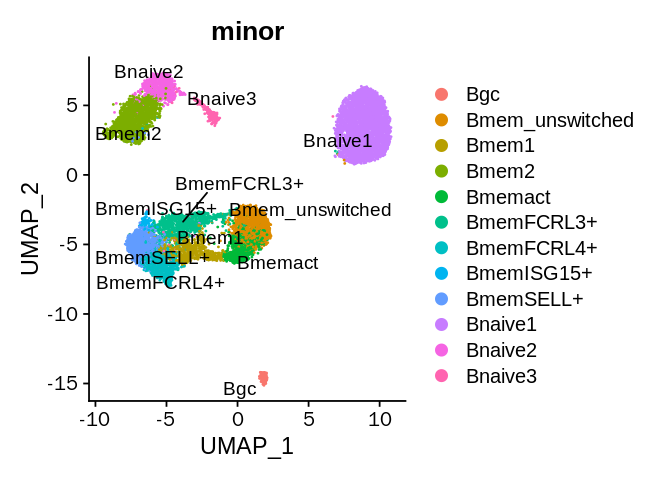

In [10]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(bcell, group.by = 'minor', label = TRUE,repel = TRUE)

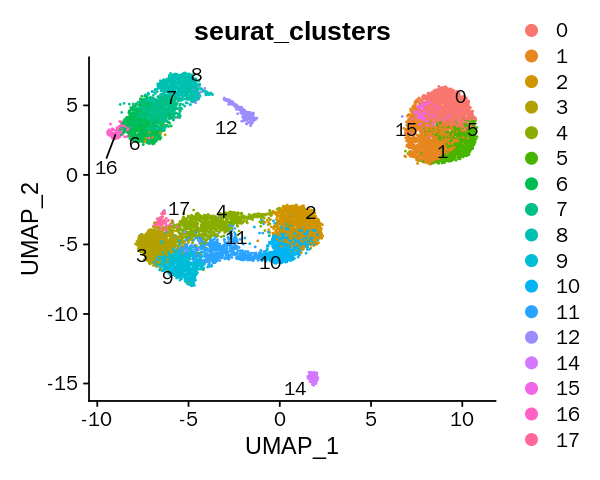

In [11]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(bcell, group.by = 'seurat_clusters', label = TRUE,repel = TRUE)

In [14]:
unique(bcell$minor)

[1] "Bmem2"           "BmemSELL+"       "BmemISG15+"      "BmemFCRL4+"     
 [5] "Bnaive2"         "BmemFCRL3+"      "Bnaive3"         "Bgc"            
 [9] "Bmem_unswitched" "Bnaive1"         "Bmemact"         "Bmem1"

In [15]:
bcell$curated = bcell$minor
bcell$curated[bcell$seurat_clusters == '7'] = 'Bmem_S100A8'
bcell$curated[bcell$seurat_clusters == '6'] = 'Bmem_SLC35F1'
bcell$curated[bcell$seurat_clusters == '16'] = 'Bmem_TNF'
bcell$curated[bcell$seurat_clusters %in% c('3','9','11')] = 'Bmem_TOX'
bcell$curated[bcell$curated == 'BmemISG15+'] = 'Bmem_ISG15'
bcell$curated[bcell$curated == 'BmemFCRL3+'] = 'Bmem_FCRL3'
bcell$curated[bcell$curated == 'Bmem_unswitched'] = 'Bmem_IGHM'
bcell$curated[bcell$curated == 'Bmemact'] = 'Bmem_STAT4'
bcell$curated[bcell$curated == 'Bgc'] = 'GCB_AICDA'
bcell$curated[bcell$curated %in% c('Bnaive1','Bnaive2','Bnaive3')] = 'Bnaive_FCER2'

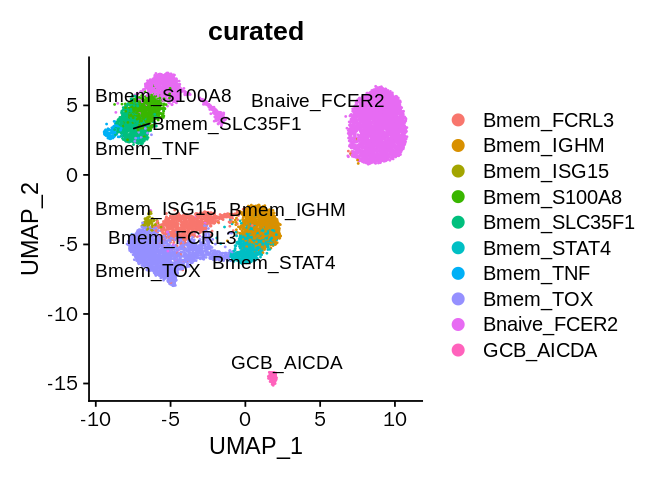

In [16]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(bcell, group.by = 'curated', label = TRUE,repel = TRUE)

In [17]:
saveRDS(bcell,file = '~/HPV/res/public_rna/seurat_rds/annotated/b.rds')